In [166]:
import numpy as np

from matplotlib import pyplot as plt

import medleydb as mdb

from scipy import signal
from scipy.io import wavfile

import librosa
import librosa.display

In [140]:
dir(mdb)

['ANNOT_PATH',
 'ARTIST_INDEX',
 'AUDIO_AVAILABLE',
 'AUDIO_PATH',
 'GRDIVE_CONFIG_PATH',
 'INST_F0_TYPE',
 'INST_TAXONOMY',
 'MEDLEYDB_PATH',
 'METADATA_PATH',
 'MIXING_COEFFICIENTS',
 'MultiTrack',
 'PYIN_N3_PATH',
 'TRACK_LIST_BACH10',
 'TRACK_LIST_EXTRA',
 'TRACK_LIST_V1',
 'TRACK_LIST_V2',
 'Track',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'environ',
 'fhandle',
 'get_duration',
 'get_files_for_instrument',
 'get_valid_instrument_labels',
 'is_valid_instrument',
 'json',
 'load_all_multitracks',
 'load_melody_multitracks',
 'load_multitracks',
 'logging',
 'multitrack',
 'path',
 'read_annotation_file',
 'read_tracklist',
 'utils',
 'version',
 'warnings',
 'yaml']

In [141]:
help(mdb.load_multitracks)

Help on function load_multitracks in module medleydb.utils:

load_multitracks(track_list)
    Load a list of multitracks.
    
    Parameters
    ----------
    track_list : list
        List of track ids in format 'Artist_Title'
    
    Returns
    -------
    multitracks : dict
        List of multitrack objects.
    
    Examples
    --------
    >>> track_list = ['ArtistName1_TrackName1',                       'ArtistName2_TrackName2',                       'ArtistName3_TrackName3']
    >>> multitracks = load_multitracks(track_list)



In [142]:
tracks = mdb.load_multitracks(["Phoenix_ColliersDaughter"])

In [143]:
mix = next(tracks)

In [144]:
help(mix)

Help on MultiTrack in module medleydb.multitrack object:

class MultiTrack(builtins.object)
 |  MultiTrack(track_id)
 |  
 |  MultiTrack Class definition.
 |  
 |  This class loads all available metadata, annotations, and filepaths for a
 |  given multitrack directory.
 |  
 |  Parameters
 |  ----------
 |  track_id : str
 |      Track id in format 'Artist_Title'.
 |  
 |  Attributes
 |  ----------
 |  artist : str
 |      The artist of the multitrack
 |  title : str
 |      The title of the multitrack
 |  track_id : str
 |      The unique identifier of the multitrack. In the form 'Artist_Title'
 |  annotation_dir : str
 |      Path to multitrack's annotation directory
 |  audio_path : str
 |      Path to multitrack's top level audio directory
 |  mix_path : str
 |      Path to multitrack's mix file.
 |  melody_rankings : dictionary
 |      Dictionary of melody rankings keyed by stem id
 |  melody1_fpath : str
 |      Path to melody 1 annotation file
 |  melody2_fpath : str
 |      Pat

In [145]:
mix.audio_path

'C:\\Users\\Nolan\\Documents\\MedleyDB\\Audio\\Phoenix_ColliersDaughter'

In [146]:
mix.mix_path

'C:\\Users\\Nolan\\Documents\\MedleyDB\\Audio\\Phoenix_ColliersDaughter\\Phoenix_ColliersDaughter_MIX.wav'

In [147]:
dir(mix)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_duration',
 '_get_activation_annotations',
 '_get_melody_rankings',
 '_get_mixing_coefficient',
 '_get_predominant_stem',
 '_load_metadata',
 '_melody1_annotation',
 '_melody2_annotation',
 '_melody3_annotation',
 '_meta_path',
 '_metadata',
 '_parse_metadata',
 '_raw_dir_path',
 '_raw_fmt',
 '_stem_activations',
 '_stem_activations_idx',
 '_stem_activations_idx_v2',
 '_stem_activations_v2',
 '_stem_dir_path',
 '_stem_fmt',
 'activation_conf_fpath',
 'activation_conf_from_stem',
 'activation_conf_v2_fpath',
 'artist',
 'audio_path',
 'bass_stems',
 'dataset_version',
 'duration',
 'genre',
 'has_bleed',
 'has_melody',
 

In [148]:
mix.stem_instruments

['Main System', 'acoustic guitar', 'electric bass', 'flute', 'violin']

In [149]:
flutes = mdb.get_files_for_instrument("flute", [mix])

In [150]:
flute = next(flutes)

In [151]:
help(wavfile.read)

Help on function read in module scipy.io.wavfile:

read(filename, mmap=False)
    Open a WAV file
    
    Return the sample rate (in samples/sec) and data from a WAV file.
    
    Parameters
    ----------
    filename : string or open file handle
        Input wav file.
    mmap : bool, optional
        Whether to read data as memory-mapped.
        Only to be used on real files (Default: False).
    
        .. versionadded:: 0.12.0
    
    Returns
    -------
    rate : int
        Sample rate of wav file.
    data : numpy array
        Data read from wav file.  Data-type is determined from the file;
        see Notes.
    
    Notes
    -----
    This function cannot read wav files with 24-bit data.
    
    Common data types: [1]_
    
    =====================  ===========  ===========  =============
         WAV format            Min          Max       NumPy dtype
    =====================  ===========  ===========  =============
    32-bit floating-point  -1.0         +1.0  

In [158]:
help(plt.specgram)

Help on function specgram in module matplotlib.pyplot:

specgram(x, NFFT=None, Fs=None, Fc=None, detrend=None, window=None, noverlap=None, cmap=None, xextent=None, pad_to=None, sides=None, scale_by_freq=None, mode=None, scale=None, vmin=None, vmax=None, *, data=None, **kwargs)
    Plot a spectrogram.
    
    Call signature::
    
      specgram(x, NFFT=256, Fs=2, Fc=0, detrend=mlab.detrend_none,
               window=mlab.window_hanning, noverlap=128,
               cmap=None, xextent=None, pad_to=None, sides='default',
               scale_by_freq=None, mode='default', scale='default',
               **kwargs)
    
    Compute and plot a spectrogram of data in *x*.  Data are split into
    *NFFT* length segments and the spectrum of each section is
    computed.  The windowing function *window* is applied to each
    segment, and the amount of overlap of each segment is
    specified with *noverlap*. The spectrogram is plotted as a colormap
    (using imshow).
    
    Parameters
    

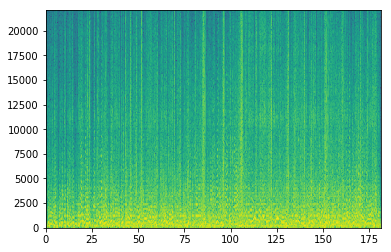

In [185]:
sample_rate, mix_audio = wavfile.read(mix.mix_path)
mix_audio = mix_audio.mean(1)
mix_audio = mix_audio[sample_rate*8:int(-sample_rate*1.5)]
s_mix, freqs, times, image = plt.specgram(mix_audio, Fs=sample_rate, mode="magnitude", NFFT=512, noverlap=256)

In [160]:
data.shape

(257, 31206)

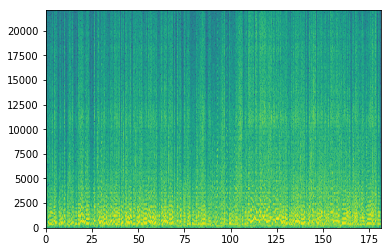

In [186]:
sample_rate, flute_audio = wavfile.read(flute)
flute_audio = flute_audio.mean(1)
flute_audio = flute_audio[sample_rate*8:int(-sample_rate*1.5)]
s_flute, freqs, times, image = plt.specgram(flute_audio, Fs=sample_rate, mode="magnitude", NFFT=512, noverlap=256)

# With scipy and matplotlib

In [198]:
help(signal.spectrogram)

Help on function spectrogram in module scipy.signal.spectral:

spectrogram(x, fs=1.0, window=('tukey', 0.25), nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, mode='psd')
    Compute a spectrogram with consecutive Fourier transforms.
    
    Spectrograms can be used as a way of visualizing the change of a
    nonstationary signal's frequency content over time.
    
    Parameters
    ----------
    x : array_like
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` time series. Defaults to 1.0.
    window : str or tuple or array_like, optional
        Desired window to use. If `window` is a string or tuple, it is
        passed to `get_window` to generate the window values, which are
        DFT-even by default. See `get_window` for a list of windows and
        required parameters. If `window` is array_like it will be used
        directly as the window and its length must

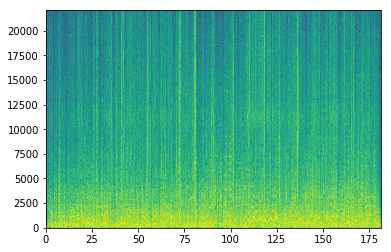

In [200]:
freqs, times, s_mix = signal.spectrogram(mix_audio, fs=sample_rate, mode="magnitude", nfft=512, noverlap=0)
plt.pcolormesh(times, freqs, 20*np.log10(s_mix))

In [202]:
s_mix.shape

(257, 31207)

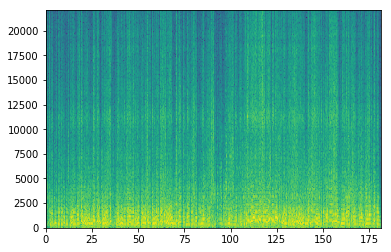

In [201]:
freqs, times, s_flute = signal.spectrogram(flute_audio, fs=sample_rate, mode="magnitude", nfft=512, noverlap=0)
plt.pcolormesh(times, freqs, 20*np.log10(s_flute))

$mask_{flute}=\frac{S_{flute}}{S_{flute}+S_{mix}}$

In [189]:
mask_flute = s_flute / (s_flute + s_mix + 1e-9)

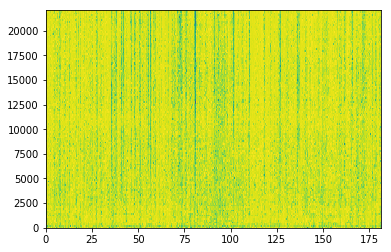

In [192]:
plt.pcolormesh(times, freqs, 20*np.log10(mask_flute))

In [193]:
mask_flute.shape

(129, 35665)

In [195]:
s_mix.shape

(129, 35665)

In [196]:
flute_estimate = s_mix * mask_flute

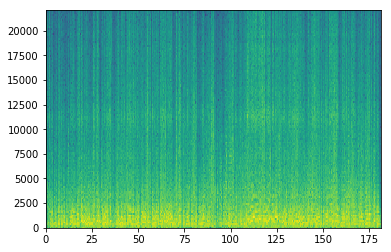

In [197]:
plt.pcolormesh(times, freqs, 20*np.log10(flute_estimate))